In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mintpy.utils import readfile, utils as ut, plot as pp

matplotlib.rcParams.update({'font.size': 16})


In [13]:
import sarut.tools.plot as sarplt

Geos = {'Aqaba a087'     : {'proc' : 'topsStack', 
                            'geo'  : '/marmot-nobak/ykliu/aqaba/topsStack/a087/mintpy_new/inputs/geometryGeo.h5'},
        'Aqaba a160'     : {'proc' : 'ARIA', 
                            'geo'  : '/marmot-nobak/ykliu/aqaba/a160/aria/azimuthAngle/20141028_20141016',
                            'az_df': -90.0},
        'Aqaba d021'     : {'proc' : 'topsStack',
                            'geo'  : '/marmot-nobak/ykliu/aqaba/topsStack/d021/mintpy_new/inputs/geometryGeo.h5'},
        'Aqaba d123'     : {'proc' : 'topsApp', 
                            'geo'  : '/marmot-nobak/ykliu/aqaba/d123/process/merged/geom_reference/los.geo',
                            'az_na': '>-99.0'},
        'Makran a115'    : {'proc' : 'topsStack',
                            'geo'  : '/marmot-nobak/olstephe/InSAR/Makran/T115a/mintpy/process_stack_all_time_full_eff_repeat_ion/inputs/geometryGeo.h5'},
        'Makran a086'    : {'proc' : 'topsApp',
                            'geo'  : '/marmot-nobak/olstephe/InSAR/Makran/T86a/mintpy/merged_files/geometryGeo_merge.h5'},
        'Makran d020'    : {'proc' : 'topsApp',
                            'geo'  : '/marmot-nobak/olstephe/InSAR/Makran/T20d/mintpy/merged_files/geometryGeo_merge.h5'},
        'Makran d093'    : {'proc' : 'topsApp',
                            'geo'  : '/marmot-nobak/olstephe/InSAR/Makran/T93d/mintpy/process_full_skip_1_2_six_month_stages/inputs/geometryGeo.h5'},
        'Haiyuan a128'   : {'proc' : 'topsApp', 
                            'geo'  : '/marmot-nobak/ykliu/haiyuan/a128/process/20220105-20220117/merged/los.rdr.geo'},
        'Haiyuan d033'   : {'proc' : 'topsApp', 
                            'geo'  : '/marmot-nobak/ykliu/haiyuan/d033/process/20211229-20220110/merged/los.rdr.geo'},
        'Sierra a064'    : {'proc' : 'topsApp', 
                            'geo'  : '/marmot-nobak/ykliu/LV/a064/mintpy/inputs/geometryGeo.h5'},
        'Sierra a137'    : {'proc' : 'topsApp', 
                            'geo'  : '/marmot-nobak/ykliu/LV/a137/mintpy/inputs/geometryGeo.h5'},
        'Sierra d144'    : {'proc' : 'topsApp', 
                            'geo'  : '/marmot-nobak/ykliu/LV/d144/mintpy/inputs/geometryGeo.h5'},
        'Texas d085'     : {'proc' : 'topsStack', 
                            'geo'  : '/marmot-nobak/ykliu/texas/d085/mintpy/inputs/geometryGeo.h5'},
        'Australia d046' : {'proc' : 'topsStack', 
                            'geo'  : '/marmot-nobak/ykliu/australia/d046/mintpy/inputs/geometryGeo.h5'},
        'David a069'     : {'proc' : 'topsStack', 
                            'los'  : '/marmot-nobak/ykliu/david/a069/stack_proc/merged/geom_reference/los.rdr',
                            'lat'  : '/marmot-nobak/ykliu/david/a069/stack_proc/merged/geom_reference/lat.rdr',
                            'lon'  : '/marmot-nobak/ykliu/david/a069/stack_proc/merged/geom_reference/lon.rdr'},
        }

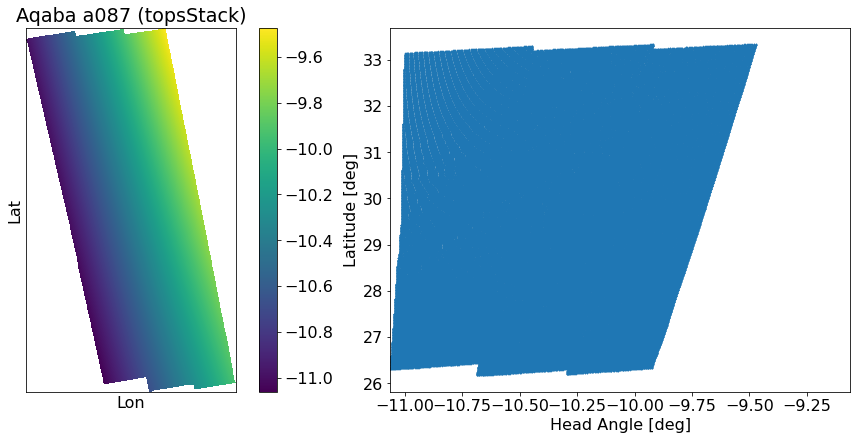

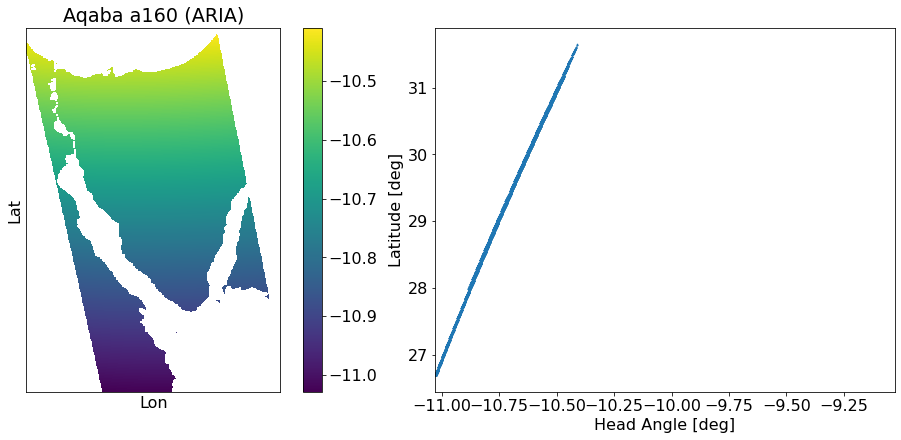

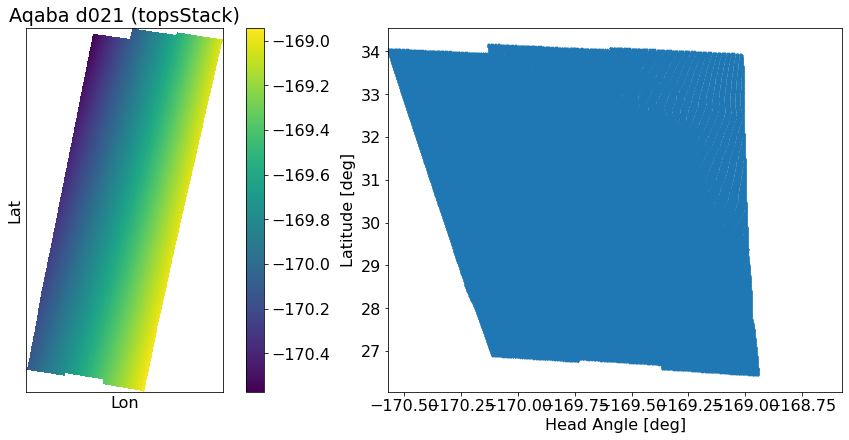

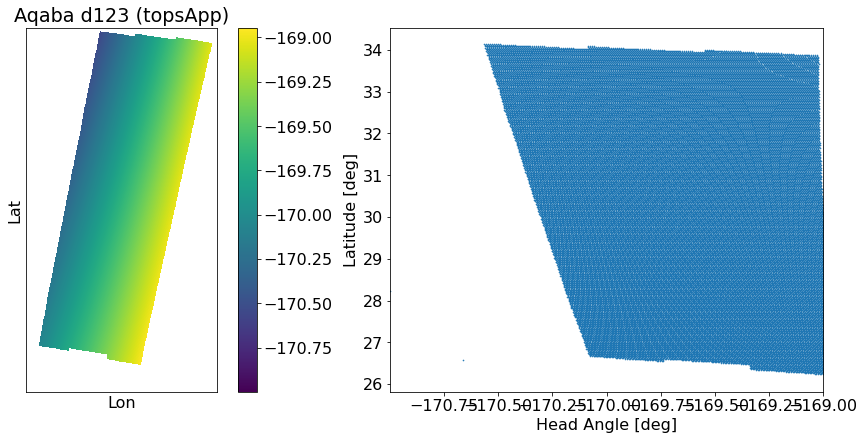

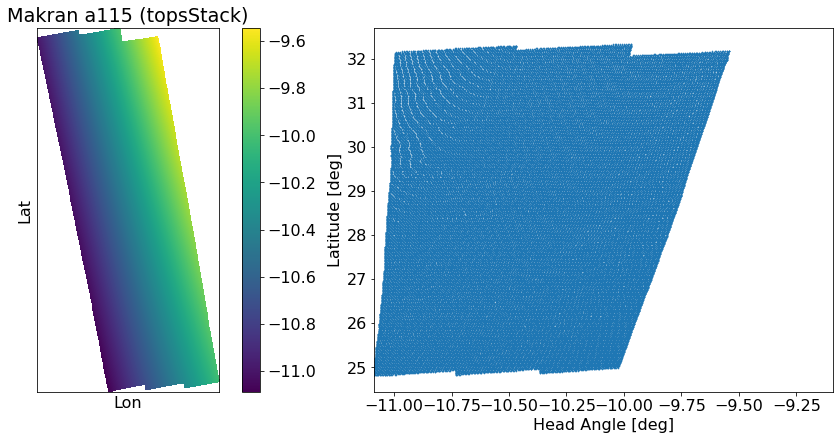

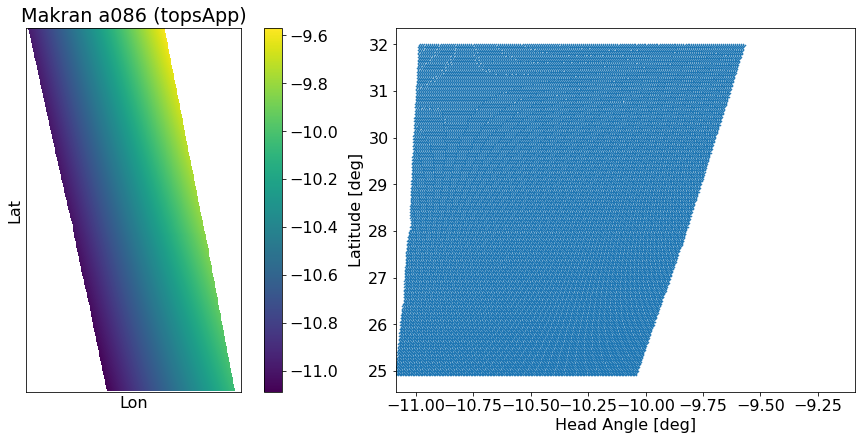

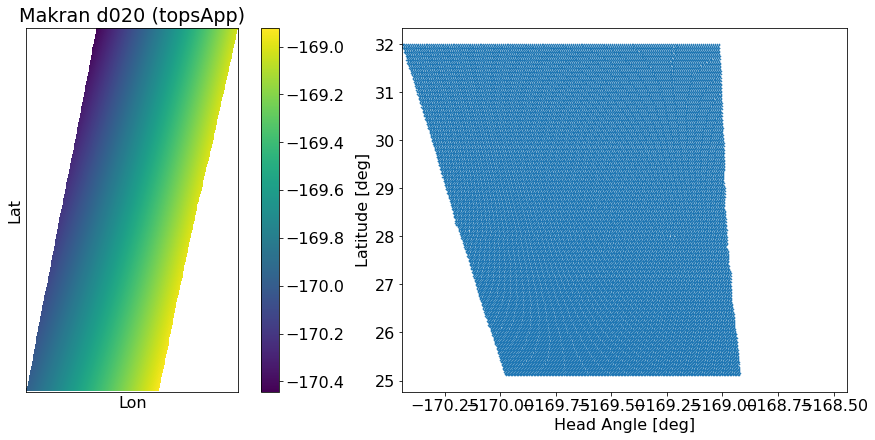

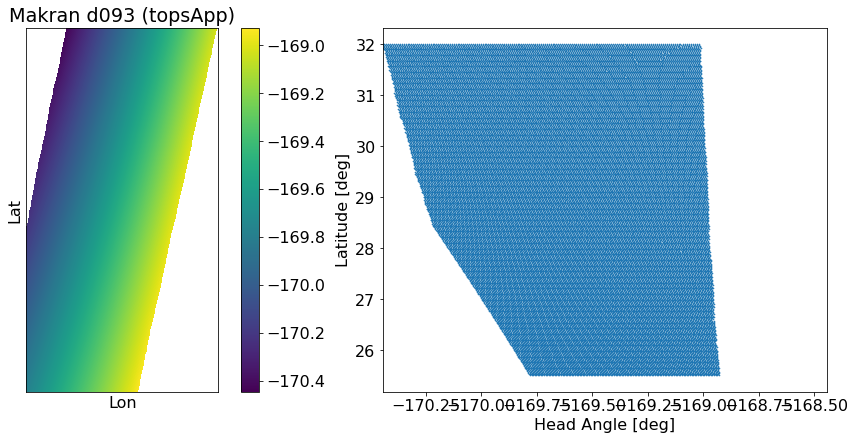

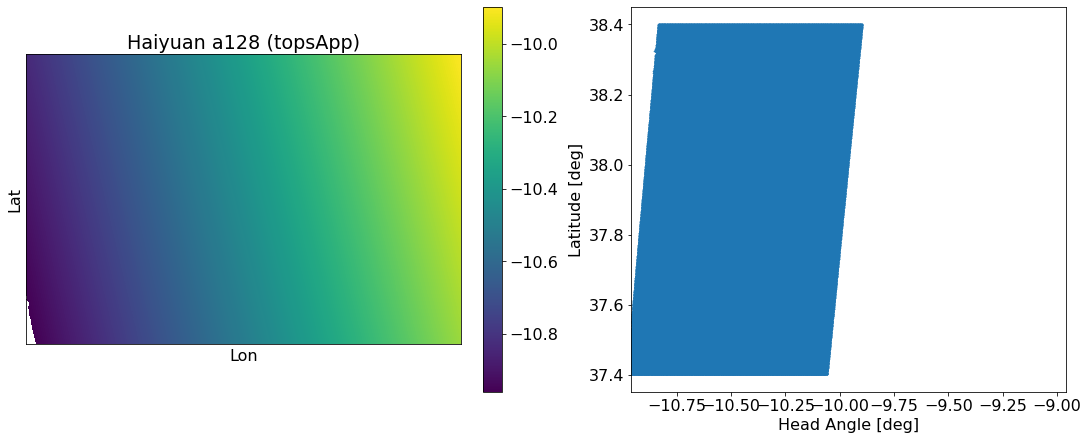

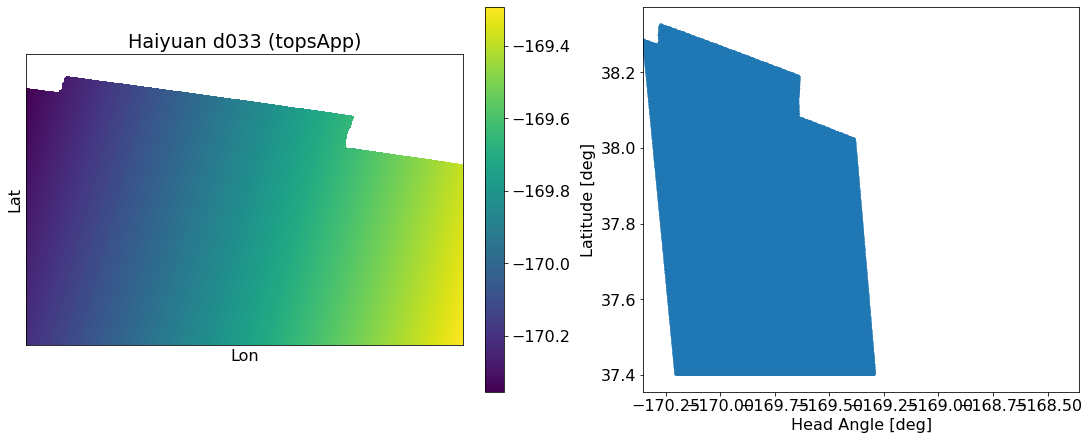

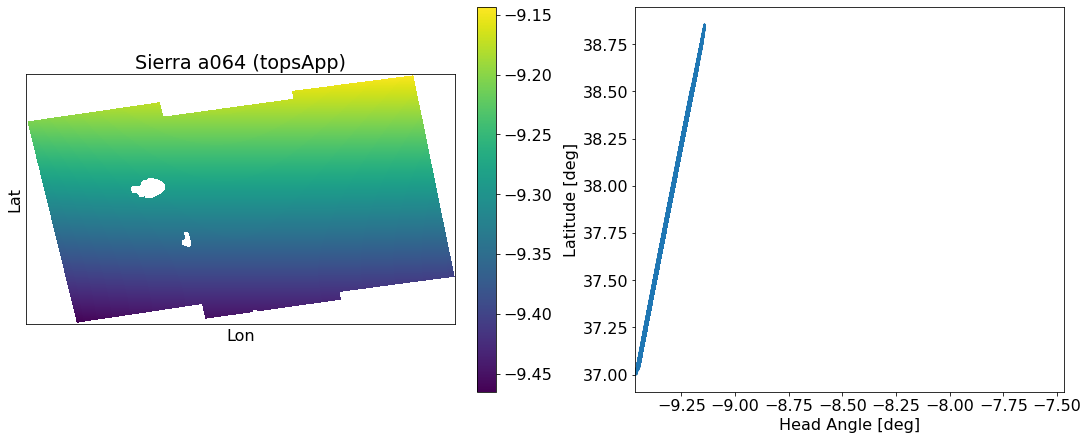

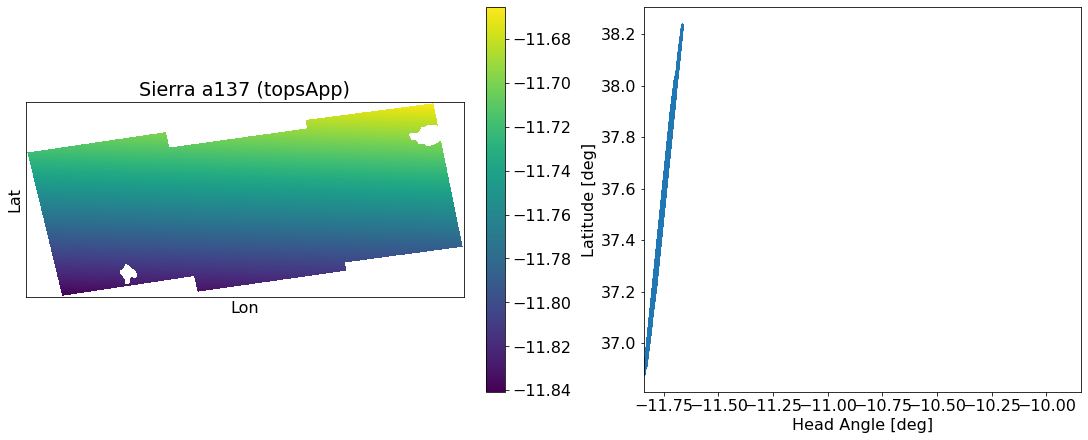

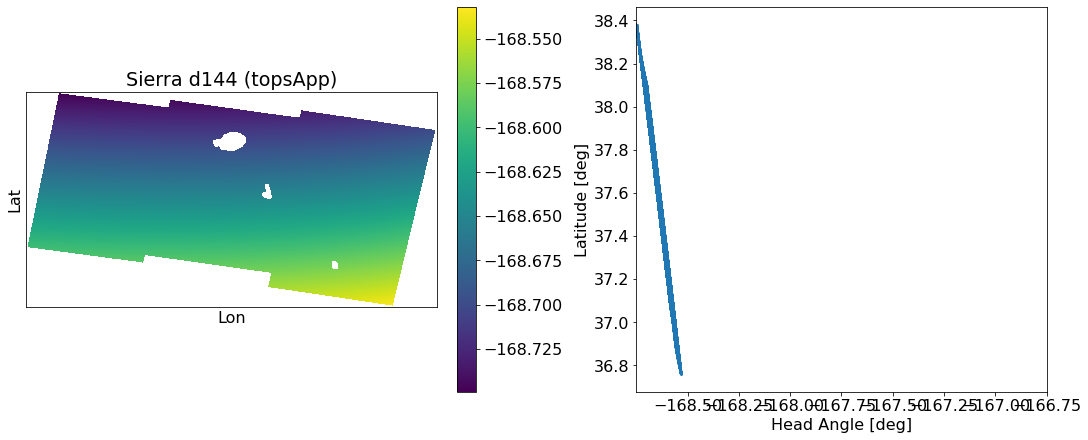

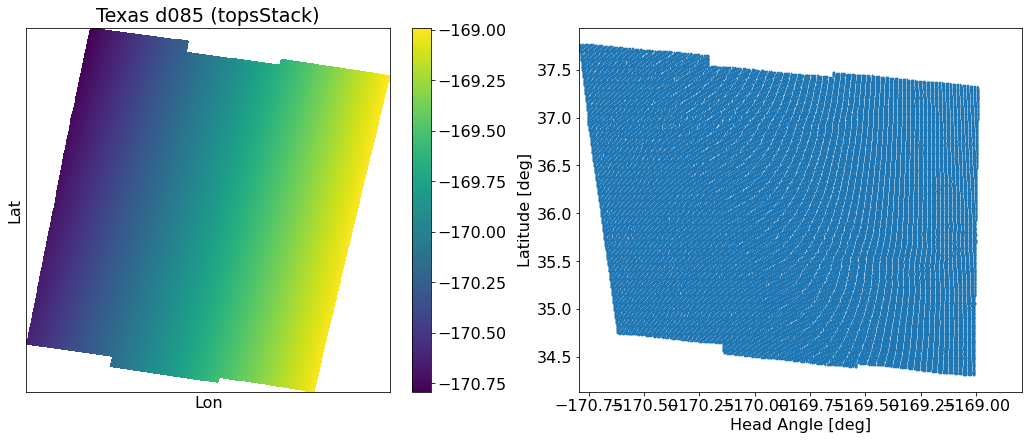

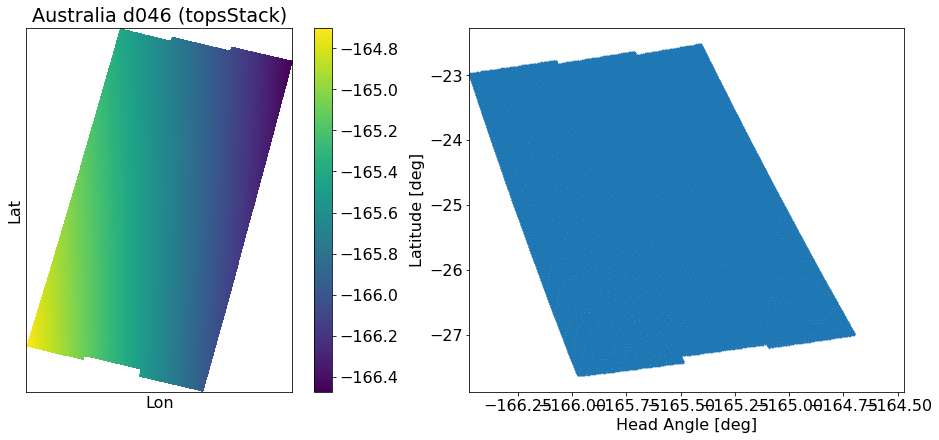

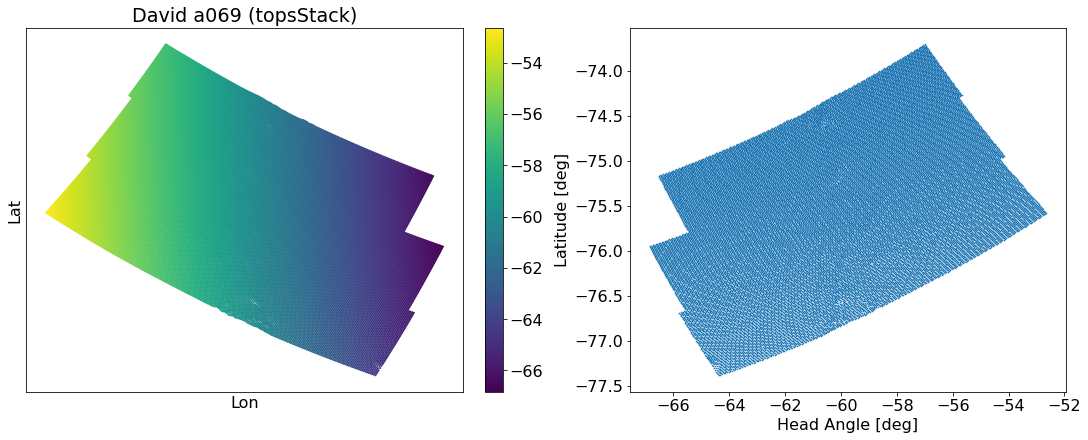

In [47]:
savedir = False
show    = True
xspan   = 2.0
var_str = 'Head'

for key in Geos:
    if 'David' in key:
        xspan = None
    
    ## Read geometry 
    if 'geo' in Geos[key]:
        azi, atr = readfile.read(Geos[key]['geo'], datasetName='azimuthAngle')

        if 'latitude' in atr:
            lat, atr = readfile.read(Geos[key]['geo'], datasetName='latitude')
        elif 'Y_FIRST' in atr:
            xmin   = float(atr['X_FIRST'])
            xstp   = float(atr['X_STEP'] )
            ymin   = float(atr['Y_FIRST'])
            ystp   = float(atr['Y_STEP'] )
            width  =   int(atr['WIDTH']  )
            length =   int(atr['LENGTH'] )
            lon = np.tile(np.linspace(xmin, xmin+xstp* width,  width), (length, 1))
            lat = np.tile(np.linspace(ymin, ymin+ystp*length, length), ( width, 1)).T
    else:
        xs = 40
        ys = 40
        azi, atr = readfile.read(Geos[key]['los'], datasetName='azimuthAngle', xstep=xs, ystep=ys)
        lat, atr = readfile.read(Geos[key]['lat'], datasetName='1'           , xstep=xs, ystep=ys)
        lon, atr = readfile.read(Geos[key]['lon'], datasetName='1'           , xstep=xs, ystep=ys)       

        
    ## Set NaN    
    azi[azi==0.0] = np.nan
    if 'az_df' in Geos[key]:
        azi += Geos[key]['az_df']
    if 'az_na' in Geos[key]:
        string = Geos[key]['az_na']
        if string.startswith('>'):
            azi[azi > float(string.split('>')[-1])] = np.nan
        elif string.startswith('<'):
            azi[azi < float(string.split('<')[-1])] = np.nan
    head = ut.azimuth2heading_angle(azi)
    lat[np.isnan(head)] = np.nan
    lon[np.isnan(head)] = np.nan 

    
    ## Plot
    figsize = [15,6]
    titstr = '{} ({})'.format(key, Geos[key]['proc'])
    if 'geo' in Geos[key]:
        if var_str == 'Head':
            var = np.array(head)
        elif var_str == 'Azimuth':
            var = np.array(azi)
            
        fig, ax = plt.subplots(figsize=figsize, ncols=2)
        im = ax[0].imshow(var)
        plt.colorbar(im, ax=ax[0], fraction=0.05)
        ax[0].set_title(titstr)
        ax[0].set_xlabel('Lon')
        ax[0].set_ylabel('Lat')
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        
        head = head[::2, ::2]
        azi  =  azi[::2, ::2]
        lat  =  lat[::2, ::2]    
        head = head.flatten()
        azi  =  azi.flatten()
        lat  =  lat.flatten()
        
        if var_str == 'Head':
            var = np.array(head)
        elif var_str == 'Azimuth':
            var = np.array(azi)        
        
        ax[1].scatter(var, lat, s=0.4)
        ax[1].set_xlabel('{} Angle [deg]'.format(var_str))
        ax[1].set_ylabel('Latitude [deg]')
        if xspan is not None:
            if xspan > 0:
                ax[1].set_xlim(np.nanmin(var), np.nanmin(var)+xspan)
            elif xspan < 0:
                ax[1].set_xlim(np.nanmax(var), np.nanmax(var)+xspan)
        if savedir is not False:
            plt.savefig('{}/{}_lat.png'.format(savedir, var_str), dpi=300, transparent=True, bbox_inches='tight')
        if show:
            plt.show()           
        
    else:
        azi  =  azi.flatten()
        head = head.flatten()
        lat  =  lat.flatten()
        lon  =  lon.flatten()
        
        if var_str == 'Head':
            var = np.array(head)
        elif var_str == 'Azimuth':
            var = np.array(azi)        

        fig, ax = plt.subplots(figsize=figsize, ncols=2)
        sc = ax[0].scatter(lon, lat, c=var, s=1)
        plt.colorbar(sc, ax=ax[0], fraction=0.05)
        ax[0].set_title(titstr)
        ax[0].set_xlabel('Lon')
        ax[0].set_ylabel('Lat')    
        ax[0].set_xticks([])    
        ax[0].set_yticks([])
        
        ax[1].scatter(var, lat, s=0.4)
        ax[1].set_xlabel('{} Angle [deg]'.format(var_str))        
        ax[1].set_ylabel('Latitude [deg]')
        if xspan is not None:
            if xspan > 0:
                ax[1].set_xlim(np.nanmin(var), np.nanmin(var)+xspan)
            elif xspan < 0:
                ax[1].set_xlim(np.nanmax(var), np.nanmax(var)+xspan)
        if savedir is not False:
            plt.savefig('{}/{}_lat.png'.format(savedir, var_str), dpi=300, transparent=True, bbox_inches='tight')
        if show:
            plt.show()

    Geos[key]['samp_lat']  = lat
    Geos[key]['samp_{}'.format(var_str)] = var

## How heading varies

In [44]:
def compile_scatters(Geos, geolist):
    fig, ax = plt.subplots(figsize=[20,13], nrows=2)
    for key in geolist:
        orbit  = key.split(' ')[-1][0].upper()
        lat    = Geos[key]['samp_lat']
        head   = Geos[key]['samp_head']
        titstr = '{} ({})'.format(key, Geos[key]['proc'])
        if orbit == 'A':
            ax[0].scatter(head, lat, label=titstr, alpha=0.6, s=1)
            ax[0].set_xlabel('Head Angle [deg]')
            ax[0].set_ylabel('Latitude [deg]')
            ax[0].set_title('Ascending')        
        if orbit == 'D':
            ax[1].scatter(head, lat, label=titstr, alpha=0.6, s=1)
            ax[1].set_xlabel('Head Angle [deg]')
            ax[1].set_ylabel('Latitude [deg]')
            ax[1].set_title('Descending')        
        print(titstr)
    ax[0].legend(loc='lower left', markerscale=10)
    ax[1].legend(loc='lower left', markerscale=10)
    plt.show()

Texas d085 (topsStack)
Aqaba a087 (topsStack)
Aqaba d021 (topsStack)
Makran a115 (topsStack)
Makran a086 (topsApp)
Makran d020 (topsApp)
Makran d093 (topsApp)
Aqaba a160 (ARIA)
Aqaba d123 (topsApp)
Haiyuan a128 (topsApp)
Haiyuan d033 (topsApp)
Sierra a064 (topsApp)
Sierra a137 (topsApp)
Sierra d144 (topsApp)


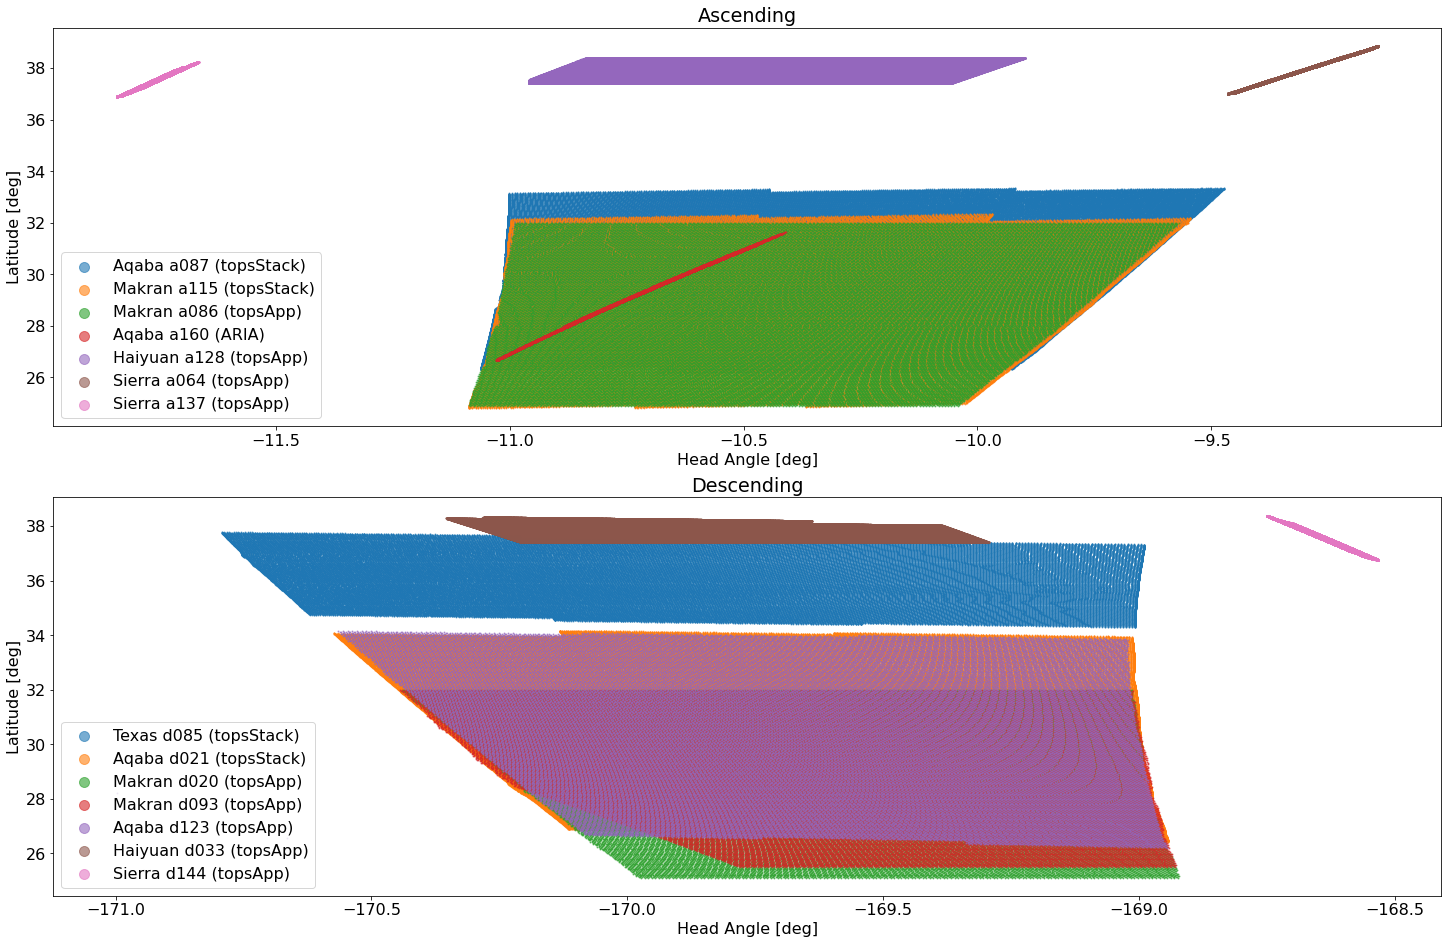

In [37]:
geolist = list(Geos.keys())[:]

## Only show the Northern Hemisphere
geolist = ['Texas d085',
            'Aqaba a087',
            'Aqaba d021',
            'Makran a115',
            'Makran a086',
            'Makran d020',
            'Makran d093',
            'Aqaba a160',
            'Aqaba d123',
            'Haiyuan a128',
            'Haiyuan d033',
            'Sierra a064',
            'Sierra a137',
            'Sierra d144']

compile_scatters(Geos, geolist)

Aqaba a087 (topsStack)
Aqaba a160 (ARIA)
Aqaba d021 (topsStack)
Aqaba d123 (topsApp)
Makran a115 (topsStack)
Makran a086 (topsApp)
Makran d020 (topsApp)
Makran d093 (topsApp)
Haiyuan a128 (topsApp)
Haiyuan d033 (topsApp)
Sierra a064 (topsApp)
Sierra a137 (topsApp)
Sierra d144 (topsApp)
Texas d085 (topsStack)
Australia d046 (topsStack)
David a069 (topsStack)


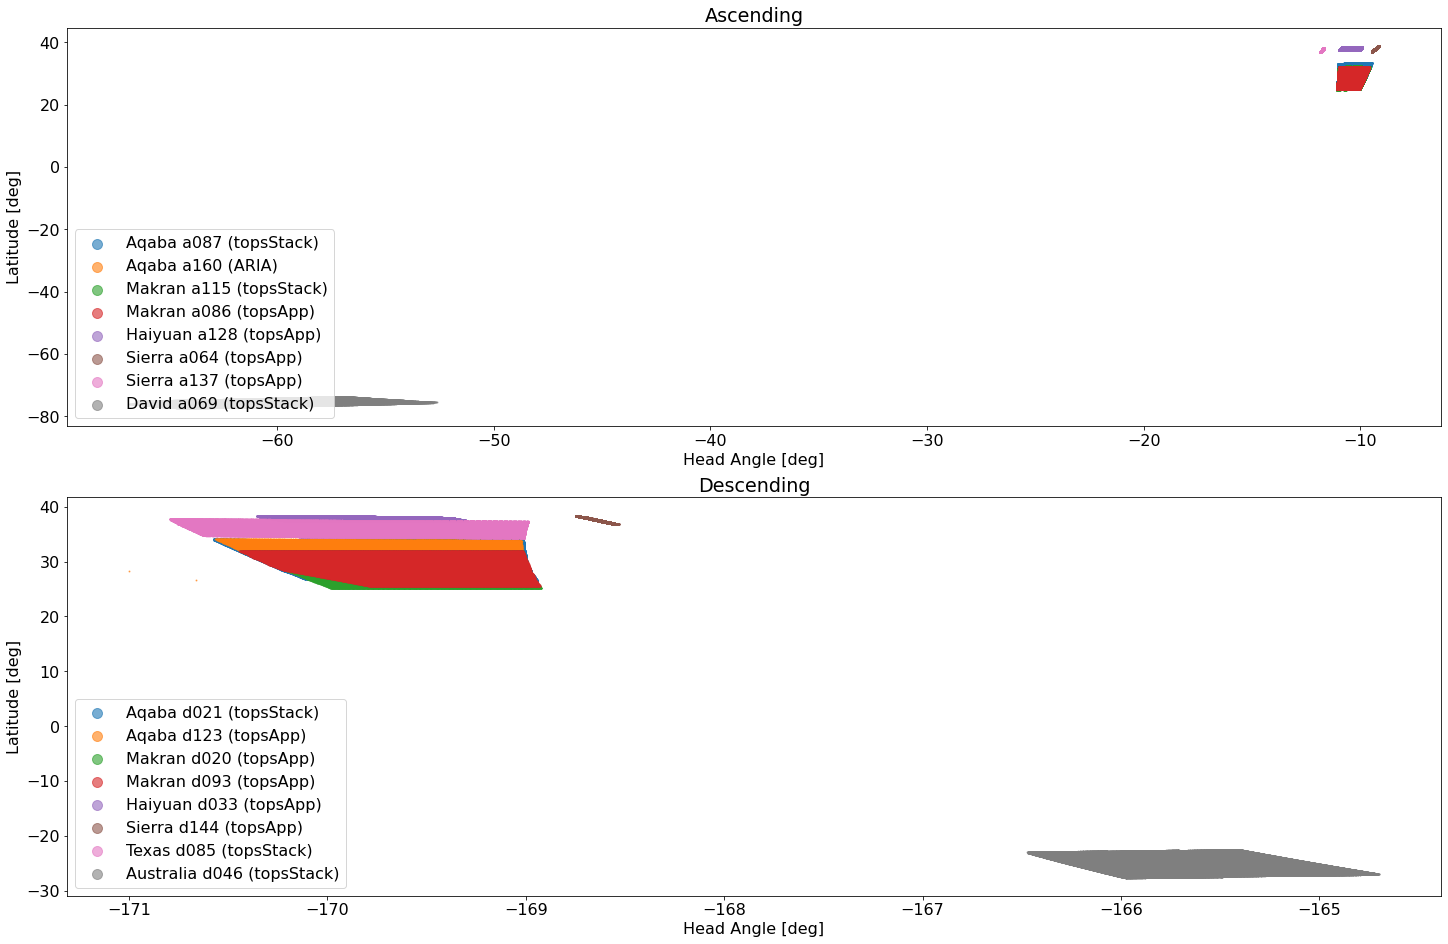

In [45]:
## Global
geolist = list(Geos.keys())[:]

compile_scatters(Geos, geolist)